In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
assoc = pd.read_csv("/cellar/users/sgoudarzi/python_scripts/compile_plink/unique_significant_meqtls_assoc.txt", delim_whitespace=True)
del assoc["Unnamed:"]
del assoc["gene"]
assoc = assoc.rename(columns={"0":"gene"})
assoc

,CHROM,POS,SNP,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE,gene
0,16,89774396,16:89774396:A:G,A,G,G,ADD,6912,0.094887,0.017024,5.57363,2.589090e-08,.,FANCA
1,16,89775946,16:89775946:A:G,A,G,G,ADD,6912,0.106956,0.017048,6.27365,3.740150e-10,.,FANCA
2,16,89790167,16:89790167:G:C,G,C,C,ADD,6912,0.116260,0.017197,6.76055,1.487210e-11,.,FANCA
3,16,89792228,16:89792228:T:C,T,C,C,ADD,6912,0.116549,0.017150,6.79594,1.165980e-11,.,FANCA
4,16,89793042,16:89793042:G:T,G,T,T,ADD,6912,0.114474,0.017193,6.65830,2.983110e-11,.,FANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2,47762216,2:47762216:T:G,T,G,G,ADD,6912,0.126953,0.023331,5.44134,5.469980e-08,.,MSH2
584,2,47766607,2:47766607:G:T,G,T,T,ADD,6912,0.129348,0.023171,5.58239,2.462600e-08,.,MSH2
585,2,47766835,2:47766835:G:C,G,C,C,ADD,6912,0.110280,0.021719,5.07751,3.924440e-07,.,MSH2
586,2,47768786,2:47768786:C:T,C,T,T,ADD,6912,0.147537,0.025053,5.88886,4.071300e-09,.,MSH2


In [5]:
meqtls = pd.read_csv("unique_meqtls.csv")
meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373


In [6]:
pos = []
for i, row in assoc.iterrows():
    l = row["SNP"].split(":")
    pos.append("chr"+l[0]+":"+l[1])

In [7]:
assoc["snp_position"] = pos
assoc

,CHROM,POS,SNP,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,ERRCODE,gene,snp_position
0,16,89774396,16:89774396:A:G,A,G,G,ADD,6912,0.094887,0.017024,5.57363,2.589090e-08,.,FANCA,chr16:89774396
1,16,89775946,16:89775946:A:G,A,G,G,ADD,6912,0.106956,0.017048,6.27365,3.740150e-10,.,FANCA,chr16:89775946
2,16,89790167,16:89790167:G:C,G,C,C,ADD,6912,0.116260,0.017197,6.76055,1.487210e-11,.,FANCA,chr16:89790167
3,16,89792228,16:89792228:T:C,T,C,C,ADD,6912,0.116549,0.017150,6.79594,1.165980e-11,.,FANCA,chr16:89792228
4,16,89793042,16:89793042:G:T,G,T,T,ADD,6912,0.114474,0.017193,6.65830,2.983110e-11,.,FANCA,chr16:89793042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2,47762216,2:47762216:T:G,T,G,G,ADD,6912,0.126953,0.023331,5.44134,5.469980e-08,.,MSH2,chr2:47762216
584,2,47766607,2:47766607:G:T,G,T,T,ADD,6912,0.129348,0.023171,5.58239,2.462600e-08,.,MSH2,chr2:47766607
585,2,47766835,2:47766835:G:C,G,C,C,ADD,6912,0.110280,0.021719,5.07751,3.924440e-07,.,MSH2,chr2:47766835
586,2,47768786,2:47768786:C:T,C,T,T,ADD,6912,0.147537,0.025053,5.88886,4.071300e-09,.,MSH2,chr2:47768786


In [8]:
snp_pos = pd.merge(assoc, meqtls, on="snp_position")
snp_pos

,CHROM,POS,SNP,REF,ALT,A1,TEST,OBS_CT,BETA,SE,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,16,89774396,16:89774396:A:G,A,G,G,ADD,6912,0.094887,0.017024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr16,89774396
1,16,89775946,16:89775946:A:G,A,G,G,ADD,6912,0.106956,0.017048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr16,89775946
2,16,89790167,16:89790167:G:C,G,C,C,ADD,6912,0.116260,0.017197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr16,89790167
3,16,89792228,16:89792228:T:C,T,C,C,ADD,6912,0.116549,0.017150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr16,89792228
4,16,89793042,16:89793042:G:T,G,T,T,ADD,6912,0.114474,0.017193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr16,89793042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2,47762216,2:47762216:T:G,T,G,G,ADD,6912,0.126953,0.023331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,47762216
584,2,47766607,2:47766607:G:T,G,T,T,ADD,6912,0.129348,0.023171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,47766607
585,2,47766835,2:47766835:G:C,G,C,C,ADD,6912,0.110280,0.021719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,47766835
586,2,47768786,2:47768786:C:T,C,T,T,ADD,6912,0.147537,0.025053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,47768786


In [9]:
positive_assoc = snp_pos[snp_pos["BETA"]>=0]
negative_assoc = snp_pos[snp_pos["BETA"]<0]

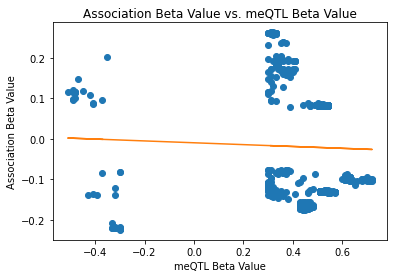

In [11]:
plt.xlabel("meQTL Beta Value")
plt.ylabel("Association Beta Value")
plt.title("Association Beta Value vs. meQTL Beta Value")
x = np.array(snp_pos["r"])
y = np.array(snp_pos["BETA"])
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

In [26]:
x = x.reshape((-1, 1))
regression1 = LinearRegression().fit(x, y)

In [27]:
r_sq1 = regression1.score(x, y)
r_sq1

0.003943015634444658